# Predict Wind Turbine Outputs from Erosion Simulation Model

First select the datatable to read in.

In [1]:
import pandas as pd

data = pd.read_table('LHC_ExpDataTable.txt',delimiter=',')

In [2]:
data.head()

,Wind_Direction,Wind_Speed,Air_Density,BldPitch1,BldPitch2,BldPitch3,LSShftFxa,LSShftFya,LSShftFza,LSShftMxa,...,B2N5Cd,B2N6Cd,B3N1Cd,B3N2Cd,B3N3Cd,B3N4Cd,B3N5Cd,B3N6Cd,GenPwr,GenTq
0,11.897727,14.243182,1.187972,5.820897,5.820897,5.820897,603.372645,-1.480176,-3.451978,4180.139509,...,0.007700,0.006868,0.401780,0.013156,0.022981,0.014157,0.015310,0.023625,4999.968130,43.093865
1,9.238636,15.865909,1.192983,9.475813,9.475813,9.475813,525.595751,-10.190943,4.547302,4180.073270,...,0.020091,0.009148,0.413584,0.014770,0.020807,0.015624,0.010094,0.009886,4999.980628,43.093646
2,9.920455,5.743182,1.268710,0.000000,0.000000,0.000000,282.630901,-22.377370,-8.900686,689.634370,...,0.020268,0.012604,0.067888,0.017982,0.017615,0.018171,0.026318,0.022285,522.712154,7.110366
3,5.965909,18.184091,1.244210,14.057100,14.057100,14.057100,454.267286,-1.667238,5.415940,4180.156382,...,0.006095,0.008638,0.577269,0.015402,0.012439,0.006013,0.007317,0.009591,5000.024840,43.093607
4,0.579545,18.415909,1.230290,0.000000,0.000000,0.000000,971.123981,13.969798,-22.057260,3683.609280,...,0.141713,0.058656,1.119633,0.602580,0.434487,0.109606,0.266178,0.172693,4312.019684,37.979519


Now, we should try to predict one of the outputs given the experiment inputs.  For the first test, we will use as the experiment inputs: 
- `Wind_Direction`
- `Wind_Speed`
- `Air_Density`

We will try to predict `GenPwr`.

In [5]:
column_names = data.columns

In [6]:
print(column_names[150:160])

Index(['B3N3Cd', 'B3N4Cd', 'B3N5Cd', 'B3N6Cd', 'GenPwr', 'GenTq'], dtype='object')


- The index for `GenPwr` is 154
- The index for `Wind_Direction` is 0
- The index for `Wind_Speed` is 1
- The index for `Air_Density` is 2

In [7]:
import numpy as np
bigarray = data.to_numpy()
inputs = np.zeros((len(bigarray[:,0]),3))
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,2]

outputs = bigarray[:,154]
print(outputs)

[4.99996813e+03 4.99998063e+03 5.22712154e+02 5.00002484e+03
 4.31201968e+03 4.99999031e+03 2.09310483e+02 2.66921044e+03
 4.99997719e+03 5.00001031e+03 5.90749039e+02 1.71725059e+03
 9.91828558e+02 4.73002375e+03 3.68898406e+03 9.44031292e+02
 1.57243040e+03 3.18141087e+02 1.48946133e+02 1.53582398e-01
 4.99997360e+03 5.00001734e+03 5.00001000e+03 4.99999781e+03
 4.99998188e+03 1.60100984e+03 5.59059038e+01 1.49671770e+03
 4.57132292e+03 4.13729261e+03 6.10253179e+02 5.39697579e+02
 7.78266021e+02 4.99999641e+03 2.11968177e+03 4.34565693e+03
 4.99164021e+03 1.85470348e+03 1.76220559e+03 6.28492423e+02
 2.38648852e+02 5.00001140e+03 1.57574473e+03 4.70630152e+02
 1.15928667e+03 4.99998360e+03 1.28115857e+03 1.78837197e+03
 4.99999500e+03 3.86653585e+03 4.99998500e+03 9.13002546e+01
 4.99999719e+03 5.00001000e+03 4.99998219e+03 3.07474473e+02
 7.52893860e+02 1.16560319e+03 1.34014357e+03 4.49467208e+03
 4.24385049e+03 4.99999672e+03 4.99997375e+03 3.37387689e+03
 3.75789189e+03 4.747246

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

The upper bounds of the range parameters are 51.73468 49.58176 50.2357 
The initial values of range parameters are 1.034694 0.9916352 1.004714 
Start of the optimization  1  : 
The number of iterations is  18 
 The value of the  marginal posterior  function is  -1678.921 
 Optimized range parameters are 0.7936502 0.6758233 0.873257 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.6473658 0.6204258 0.6286087 
Start of the optimization  2  : 
The number of iterations is  11 
 The value of the  marginal posterior  function is  -1678.921 
 Optimized range parameters are 0.7936502 0.6758233 0.873257 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 


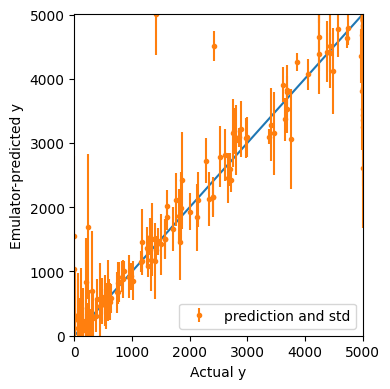

In [15]:
import numpy as np
from psimpy.emulator import ScalarGaSP
import matplotlib.pyplot as plt

# Select the model
emulator = ScalarGaSP(ndim=3,max_eval = 100,num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

In [16]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

RMSE training: 0.00010050001065851551
RMSE testing: 363.7377137720784
Correlation Coefficient training: 0.9999999999999973
Correlation Coefficient testing: 0.9601540623450514


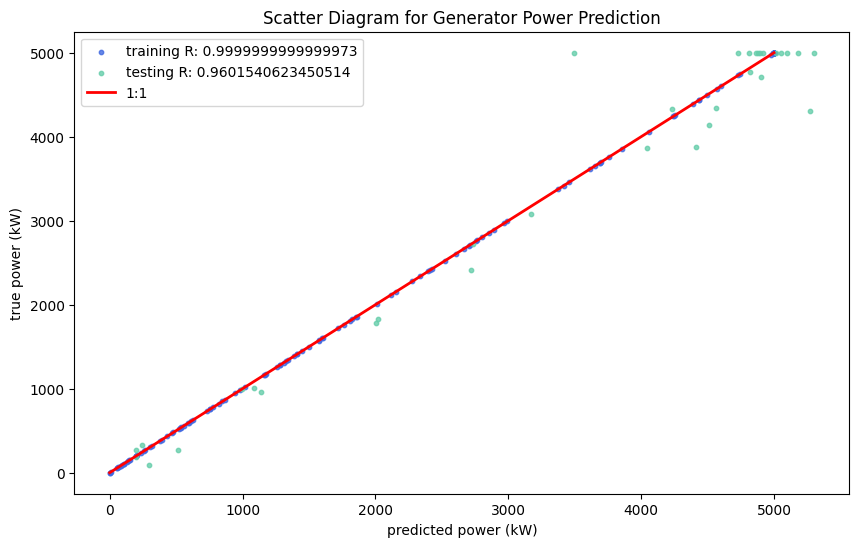

In [17]:
# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

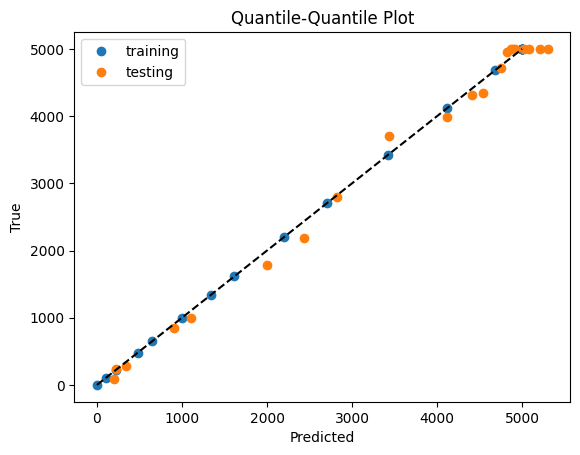

In [18]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()

The Gaussian Process Emulator Appears to be functioning very well at predicting generator power from the `Wind_Direction`,`Wind_Speed`, and `Air_Density`.  We should see how the inclusion of erosion levels effects the results

The upper bounds of the range parameters are 12.80579 12.55768 12.57121 14.59892 9.963646 14.17227 11.99943 17.29148 10.0494 
The initial values of range parameters are 0.2561158 0.2511536 0.2514243 0.2919784 0.1992729 0.2834453 0.2399886 0.3458296 0.200988 
Start of the optimization  1  : 
The number of iterations is  40 
 The value of the  marginal posterior  function is  -675.188 
 Optimized range parameters are 12.80579 0.8601234 12.57121 14.59892 9.963646 14.17227 11.56367 17.29148 10.0494 
 Optimized nugget parameter is 0 
 Convergence:  FALSE 
The initial values of range parameters are 17.69486 17.35202 17.37072 20.17258 13.76762 19.58303 16.58064 23.89312 13.88612 
Start of the optimization  2  : 


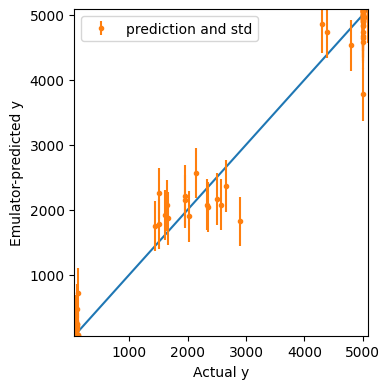

In [37]:
inputs = np.zeros((88,3+18))
bigarray = data.to_numpy()
inputs[:,0] = bigarray[:,0]
inputs[:,1] = bigarray[:,1]
inputs[:,2] = bigarray[:,531]
for i in range(18):
    inputs[:,3+i] = bigarray[:,539+i]


outputs = bigarray[:,263]

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

# Select the model
emulator = ScalarGaSP(ndim=9,num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
ax.set_xlabel('Actual y')
ax.set_ylabel('Emulator-predicted y')
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()

RMSE training: 183.11363042031812
RMSE testing: 283.8502496407288
Correlation Coefficient training: 0.9928435741409168
Correlation Coefficient testing: 0.979127617227545


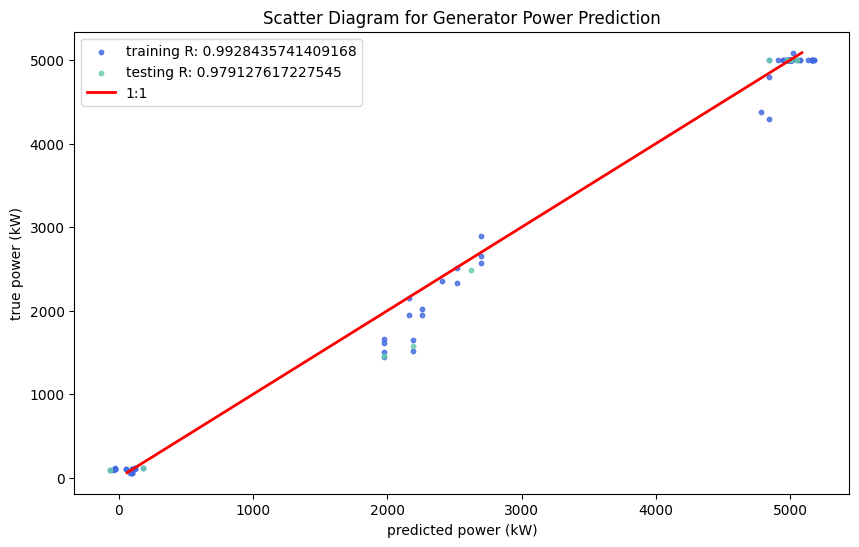

In [38]:
predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig, ax = plt.subplots(1,1,figsize=(10, 6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel("predicted power (kW)")
ax.set_ylabel("true power (kW)")
ax.set_title("Scatter Diagram for Generator Power Prediction")
ax.legend()
plt.show()

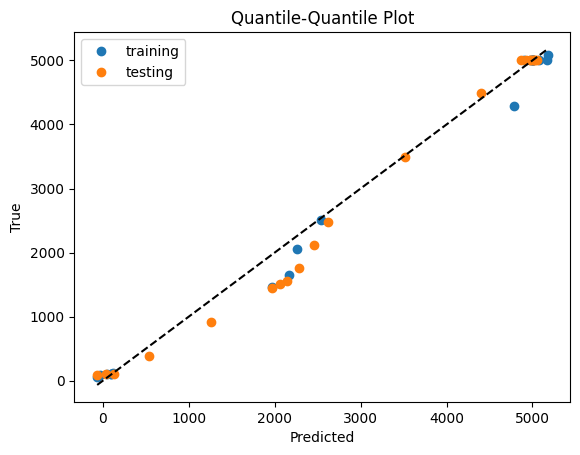

In [39]:
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()
plt.show()